# Using NLP to Predict Repository Languages Group Project

July 26th, 2022

### Contributers:
- [Eriberto Contreras](https://github.com/EribertoContreras)
- [Jason Turner](https://github.com/Jason-R-Turner)
- [Ray Cerna](https://github.com/raycerna)

In [1]:
# Import libraries and functions
import pandas as pd
import numpy as np

# Visuals
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Acquisition
import os
import json
import requests

# NLP
import re
from typing import Dict, List, Optional, Union, cast
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from collections import Counter
from bs4 import BeautifulSoup


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Custom modules
import acquire
import prepare
import explore
import modeling
from env import github_token, github_username

# Silences warnings
import warnings
warnings.filterwarnings("ignore")



train---> (89, 3)
validate---> (39, 3)
test---> (32, 3)


<img src="music-gcf687bdf3_1280.png" style="vertical-align:bottom" title="https://pixabay.com/vectors/music-rockstar-robot-guitar-7317250/">


***
## Project Description
**Purpose**: The purpose of this file is to explore the `Github repositories` and search specifically for `musicbot` queries.
- We will start initially by making a web scraper that will summon two separate dataframes at a time named `df1` and `df2`.
- We will then proceed to join them using an `append()` function.
- We will continue by pulling the list of queries using the `.full_name` column and grab the `.to_list()` function.
- Finally we will add this list to our [`Acquire.py`](https://github.com/bert-jason-ray/nlp-group-project/blob/main/acquire.py) and define our list of queries as `REPOS`.

***
## Project Deliverables

- A GitHub repository containing your work
    - A well-documented jupyter notebook with our analysis
    - A README file with a description of the project, and instructions on how to run it
- 2-5 google slides suitable for a general audience
    - Slides summarizing our findings in exploration and the results of our modeling
    - Well-labelled visualizations in our slides
    - Google slide deck is linked in the README of the repository

## Project Outline:
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px">

### 1. Acquire, prepare and clean data set.

We acquired the dataset from the `github.com` website where we found repositories related to Music Bots. We used 200 repositories and saved them as `music_bots.csv` which we used in our analysis. 
<br>

### 2. Perform Exploratory Data Analysis on the unencoded data set


<br>  


## Executive Summary:
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px">

### Recommendations and Takeaways:

More Github data is required. Scrape more data for a more accurate model.
<br> 

#### How can we use the text from a GitHub's ReadMe files to predict the main programming language of a repository?


## Data Wrangle:
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px">

# `Acquire Data`
## Using  [Acquire.py](https://github.com/bert-jason-ray/nlp-group-project/blob/main/acquire.py) file to import data frame using web scraping techniques.

In [2]:
# define the acquired file as new data frame
df = acquire.get_github_data()
df

,repo,language,readme_contents
0,jagrosh/MusicBot,Java,"<img align=""right"" src=""https://i.imgur.com/zr..."
1,Just-Some-Bots/MusicBot,Python,# MusicBot\n\n[![GitHub stars](https://img.shi...
2,SudhanPlayz/Discord-MusicBot,JavaScript,"<h1 align=""center""><img src=""./assets/logo.gif..."
3,IVETRI/SongPlayRoBot,Python,# Check Our New Bot Repo & Video :\n\n[Video](...
4,Splamy/TS3AudioBot,C#,# TS3AudioBot\n\nThis is a open-source TeamSpe...
...,...,...,...
195,Davidremo02/LazyMusicbot,NaN,"<h2 align=""centre"">Telegram Group Music Player..."
196,MrRizoel/RiZoeLXMusic,Python,"<h2 align=""centre"">ℝ𝚒ℤ𝚘𝚎𝕃𝕏𝕄𝚞𝚜𝚒𝚌 🎵</h2>\n\n### ..."
197,noirscape/MusicBot-2,Python,# Dynamic cog bot template\n\nThis is a bot te...
198,bhkvlldu/MusicBot,Python,# ⌯ Source zoro ˹♻️˼⁩\n\n• I am a developer in...


# `Prepare Data`
## Using  [Prepare.py](https://github.com/bert-jason-ray/nlp-group-project/blob/main/prepare.py) to create Clean, Stemmed, and Lemmatized data.

In [3]:
# This function take in a df and the content (in string) for the column 
#     with an option to pass lists for additional stopwords (extra_words)
#     and an option to pass words to exclude from stopwords (exclude words)
#     returns a df with the  original text, cleaned (tokenized and stopwords removed),
#     stemmed text, lemmatized text.
df = prepare.prep_github_data(df,column = 'readme_contents', extra_words=[], exclude_words=['musicbot'])

# `Splitting Data` using split_hub_data() from the [Prepare.py](https://github.com/bert-jason-ray/nlp-group-project/blob/main/prepare.py) file

In [4]:
train, validate, test = prepare.split_github_data(df)

train---> (89, 6)
validate---> (39, 6)
test---> (32, 6)


# `EXPLORE`
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px">

## Using imported visuals from [explore.py](https://github.com/bert-jason-ray/nlp-group-project/blob/main/explore.py) file.
**In this section we will be exploring our data using `bigrams`(2 word clusters) and `trigrams`(3 word clusters) across the top 5 different languages used for musicbot programs. We will be working to explore the data and find ways to answer the following questions:**
- `What are the most common words in READMEs?`
- `Does the length of the README vary by programming language?`
- `Do different programming languages use a different number of unique words?`
- `Are there any words that uniquely identify a programming language?`

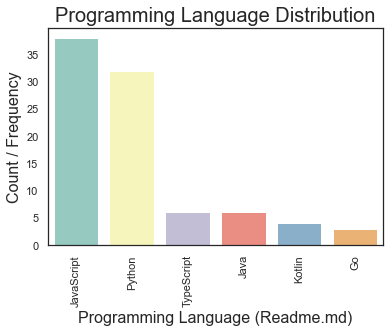

In [5]:
explore.programing_language_distribution()

### Takeaways:
 - **JavaScript & Python seem to dominate, while Java & TypeScript and all others seem to be at the 10 range.**

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

In [6]:
# Set up word counts dataframe
all_text = ' '.join(train.lemmatized)
javascript_text = ' '.join(train[train.language == 'JavaScript'].lemmatized)
python_text = ' '.join(train[train.language == 'Python'].lemmatized)
typescript_text = ' '.join(train[train.language == 'TypeScript'].lemmatized)
java_text = ' '.join(train[train.language == 'Java'].lemmatized)
go_text = ' '.join(train[train.language == 'Go'].lemmatized)
kotlin_text = ' '.join(train[train.language == 'Kotlin'].lemmatized)
all_freq = pd.Series(str(all_text).split()).value_counts()
javascript_freq = pd.Series(str(javascript_text).split()).value_counts()
python_freq = pd.Series(str(python_text).split()).value_counts()
typeScript_freq = pd.Series(str(typescript_text).split()).value_counts()
java_freq = pd.Series(str(java_text).split()).value_counts()
go_freq = pd.Series(str(go_text).split()).value_counts()
kotlin_freq = pd.Series(str(kotlin_text).split()).value_counts()
word_counts = pd.concat([all_freq, javascript_freq, python_freq, typeScript_freq,java_freq, go_freq, kotlin_freq], sort=True, axis=1)
word_counts.columns = ['all', 'JavaScript', 'python', 'typescript','java', 'go', 'kotlin']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))
top_30 = word_counts.sort_values(by='all', ascending=False).head(30)

# `What are the most common words in READMEs?`

In [7]:
top_30

,all,JavaScript,python,typescript,java,go,kotlin
music,392,54,288,13,17,11,9
song,158,56,72,5,10,3,12
text,151,6,142,1,1,0,1
option,146,5,140,0,0,0,1
command,130,55,36,13,13,2,11
spotify,124,2,101,3,1,0,17
play,123,48,57,3,3,3,9
discord,119,58,23,12,19,5,2
file,110,19,73,4,6,6,2
youtube,107,34,39,3,17,5,9


<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

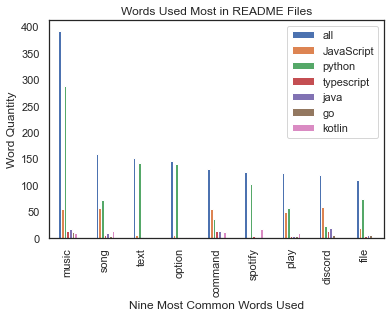

In [8]:
explore.word_distribution_vizual()

`Takeaways:`
- `Music`, `song`, `text`, `option`, `command` and `spotify` seem to be the top 6 words used in all readme files.
- For JavaScipt top 3 words used are `discord`, `command` and `song`.
- For Python top 3 words used are `music`,`text`, and `option`.
- For TypeScript top 3 words used are `music`,`command`, and `discord`.
- For Java top 3 words used are `youtube`, `music`, and `discord`.
- For Go top 3 words used are `music`,`support`,and `file`.
- For Kotlin top 3 words used are `spotify`, `command`, and `support`.

## Now we will be looking at Bigrams and Trigrams

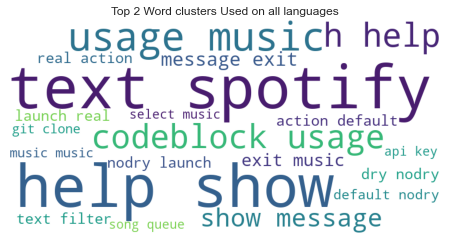

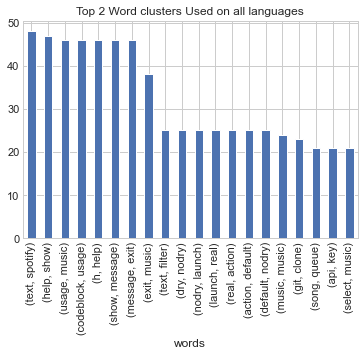

In [9]:
explore.all_words_bigram_wordcloud()
explore.all_words_bigram_barplot()

`takeaways:`
- Top five bigram clusters for all programs are `(text,spotify)`,`(help,show)`,`(usage,music)`,`(message,exit)`, and `(codeblock,usage)`.

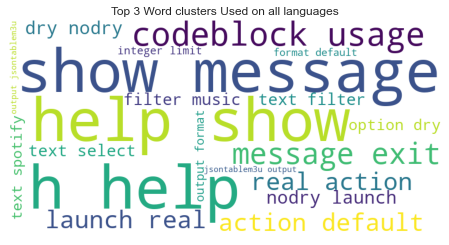

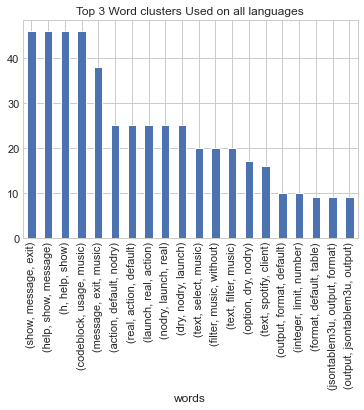

In [10]:
explore.all_words_trigram_wordcloud()
explore.all_words_trigram_barplot()

 `Takeaways:`
- Top five word trigram clusters for all words are `(show,message,exit)`,`(help,show,message)`,`(codeblock,usage,music)`,`(message,exit,music)`, and `(message,exit, music)`.

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

# `Are there any words that uniquely identify a programming language?`

## Python
###  Bigrams:

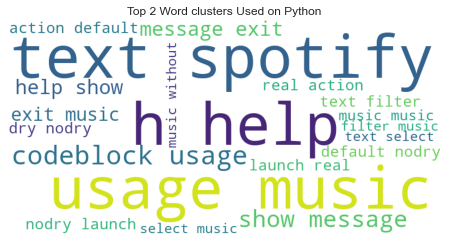

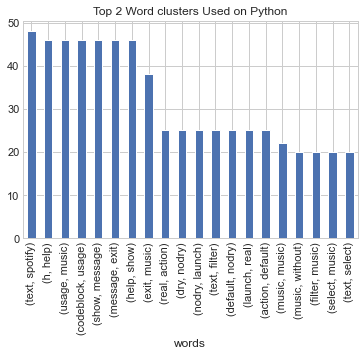

In [11]:
explore.python_bigram_wordcloud()
explore.python_bigram_barplot()

`takeaways:`
- Top five bigram clusters for Python programs are `(text,spotify)`,`(h,show)`,`(usage,music)`,`(codeblock,usage)`, and `(message,exit)`.

###  Trigrams

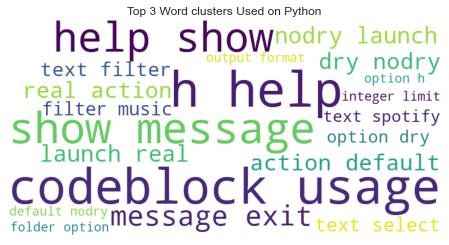

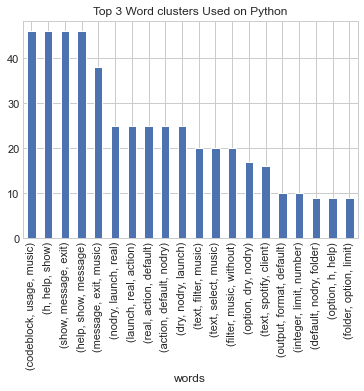

In [12]:
explore.python_trigram_wordcloud()
explore.python_trigram_barplot()

`takeaways:`
- Top five Trigram clusters for Python programs are `(codeblock,usage, ,music)`,`(h,help,show)`,`(show,messgae, exit)`,`(help,show,message)`, and `(message,exit,muisic)`.

***
## JavaScript
###  Bigrams

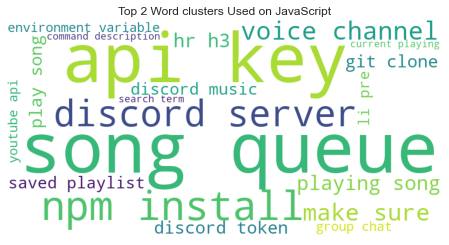

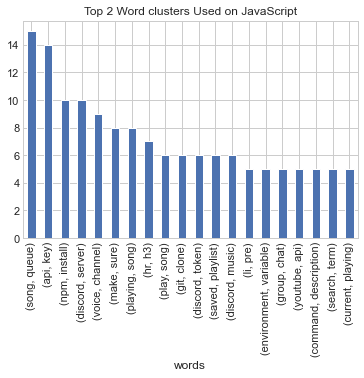

In [13]:
explore.javascript_bigram_wordcloud()
explore.javascript_bigram_barplot()

`takeaways:`
- Top five bigram clusters for JavaScript programs are `(song,queue)`,`(api,key)`,`(npm,install)`,`(discord,server)`, and `(voice, channel)`.

### Trigrams

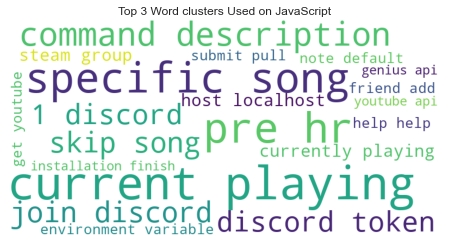

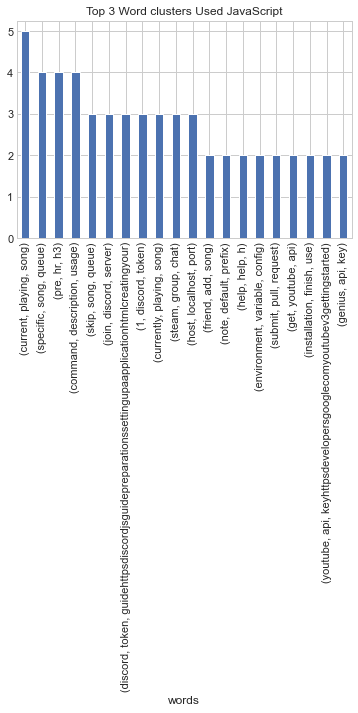

In [14]:
explore.javascript_trigram_wordcloud()
explore.javascript_trigram_barplot()

`takeaways:`
- Top five Trigram clusters for JavaScript programs are `(current,playing,song)`,`(specific,song,queue)`,`(pre,hr,h3)`,`(command,description,usage)`, and `(discord,token,guidehttpsdiscord.....)`.

***
## TypeScript
### Bigrams

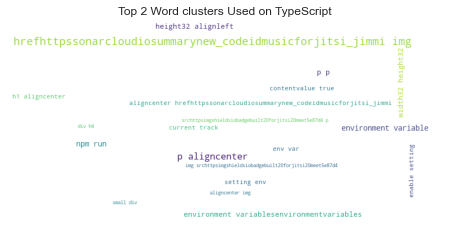

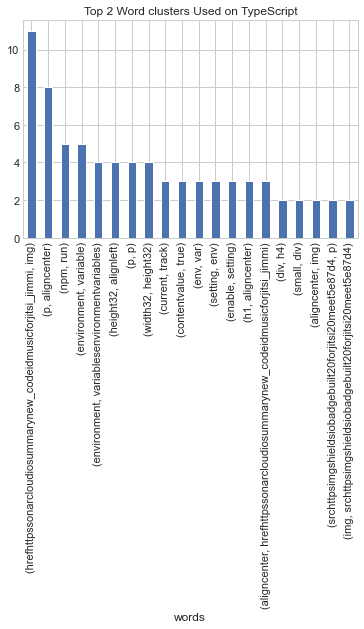

In [15]:
explore.typescript_bigram_wordcloud()
explore.typescript_bigram_barplot()

`takeaways:`
- Top five bigram clusters for TypeScript programs are `(hrefhttpssponarcloudiosummary......, img)`,`(p, aligncenter)`,`(npm, run)`,`(enviroment, variable)`, and `(enviroment, variablesenvironmentvariables)`.

### Trigrams

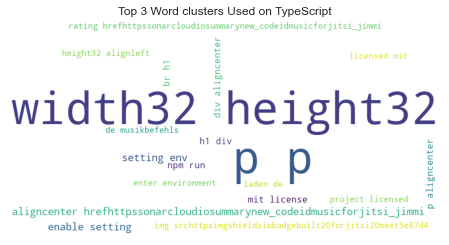

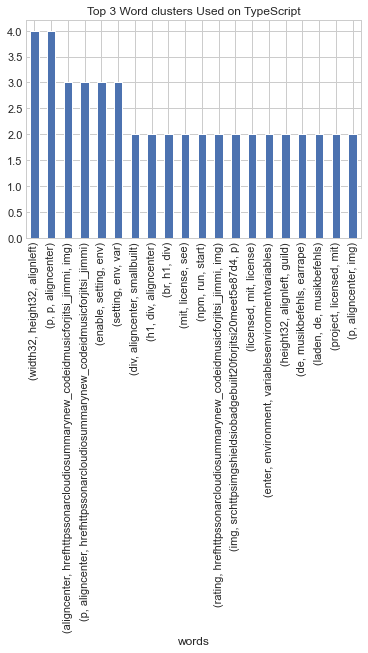

In [16]:
explore.typescript_trigram_wordcloud()
explore.typescript_trigram_barplot()

`takeaways:`
- Top 3 trigram clusters for TypeScript programs are `(with32,height32,alignleft)`,`(p,p, aligncenter)`,`(p,alligncenter,hrefhttpssonarcloudiosummary....)`

***
## Java
### Bigrams

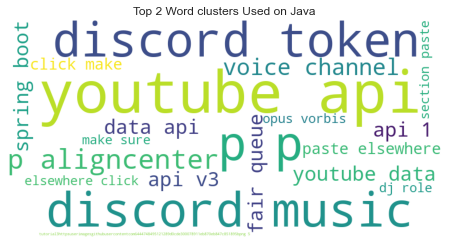

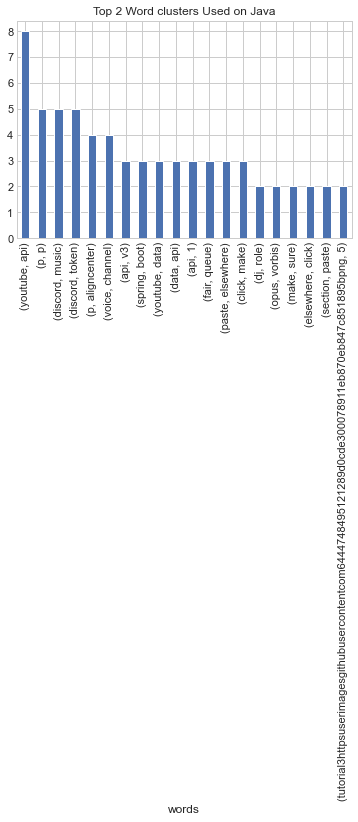

In [17]:
explore.java_bigram_wordcloud()
explore.java_bigram_barplot()

`takeaways:`
- Top five bigram clusters for Java programs are `(youtube, api)`,`(p,p)`,`(discord,music)`,`(discord, token)`, and `(p, aligncenter)`.

## Trigrams

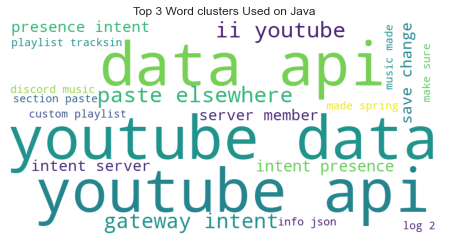

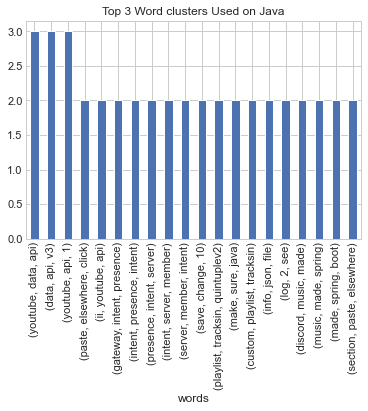

In [18]:
explore.java_trigram_wordcloud()
explore.java_trigram_barplot()    

`takeaways:`
- Top five trigram clusters for Java programs are `(youtube,data, api)`,`(data,api,v3)`,`(youtube,api,1)`,`(paste, elsewhere, click)`, and `(ii, youtube, api)`.

***
## Go
### Bigrams

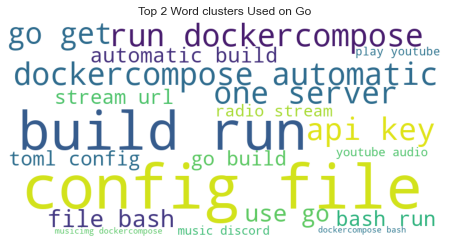

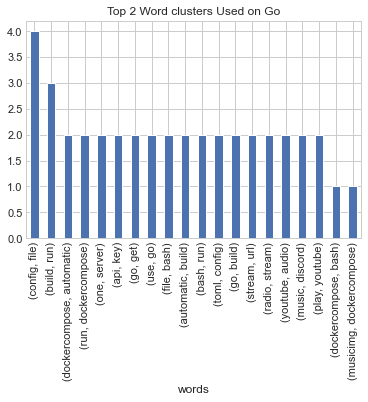

In [19]:
explore.go_bigram_wordcloud()
explore.go_bigram_barplot()

`takeaways:`
- Top five bigram clusters for Go programs are `(config,file)`,`(build,run)`,`(dockercompose, automatic)`,`(run, dockercompose)`, and `(one,server)`.


### Trigrams

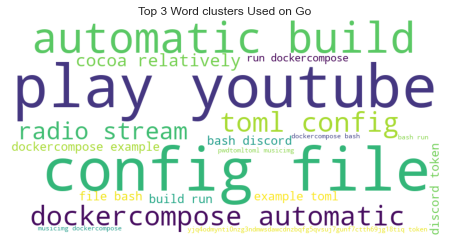

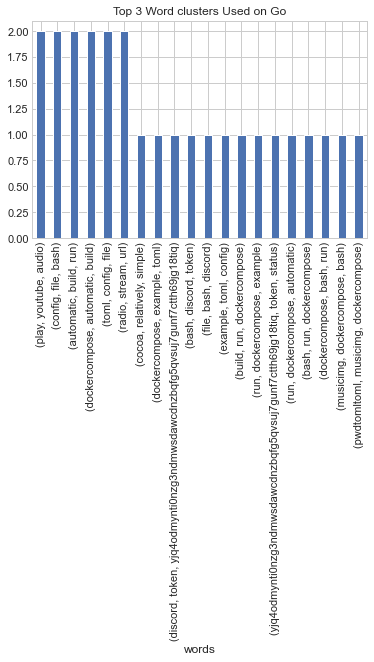

In [20]:
explore.go_trigram_wordcloud()
explore.go_trigram_barplot()

`takeaways:`
- Top five trigram clusters for Go programs are `(play, youtube, audio)`,`(config,file,bash)`,`(automatic,build,run)`,`(dockercompose,automatic,build)`, and `(toml,config,file)`.

# `Are there any words that uniquely identify a programming language?`
# Answers:
`single words:`
- For JavaScipt top 3 words used are discord, command and song.
- For Python top 3 words used are music, text, and option.
- For TypeScript top 3 words used are music,command, and discord.
- For Java top 3 words used are youtube, music, and discord.
- For Go top 3 words used are music,support,and file.
- For kotlin top 3 words used are spotify, command, and support.

`bigram:`
- Top five bigram clusters for all programs are (text,spotify), (help,show), (usage,music), (message,exit), and (codeblock,usage).
- Top five bigram clusters for JavaScript programs are (song,queue), (api,key), (npm,install), (discord,server), and (voice, channel).
- Top five bigram clusters for TypeScript programs are (hrefhttpssponarcloudiosummary......, img), (p, aligncenter), (npm, run), (enviroment, variable), and (enviroment, variablesenvironmentvariables).
- Top five bigram clusters for Java programs are (youtube, api), (p,p), (discord,music), (discord, token), and (p, aligncenter).
- Top five bigram clusters for Go programs are (config,file), (build,run), (dockercompose, automatic), (run, dockercompose), and (one,server).

`trigram`
- Top five word trigram clusters for all words are (show,message,exit), (help,show,message), (codeblock,usage,music), (message,exit,music), and (message,exit, music).
- Top five Trigram clusters for Python programs are (codeblock,usage, ,music), (h,help,show), (show,messgae, exit), (help,show,message), and (message,exit,muisic).
- Top five Trigram clusters for JavaScript programs are (current,playing,song), (specific,song,queue), (pre,hr,h3), (command,description,usage), and (discord,token,guidehttpsdiscord...).
- Top 3 trigram clusters for TypeScript programs are (with32,height32,alignleft), (p,p, aligncenter), and (p,alligncenter,hrefhttpssonarcloudiosummary...). 
- Top five trigram clusters for Java programs are (youtube,data, api), (data,api,v3), (youtube,api,1), (paste, elsewhere, click), and (ii, youtube, api).
- Top five trigram clusters for Go programs are (play, youtube, audio), (config,file,bash), (automatic,build,run), (dockercompose,automatic,build), and (toml,config,file).

***
# `Do different programming languages use a different number of unique words?`
**UNIQUE VALUE COUNTS**

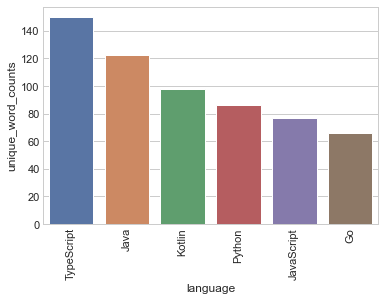

In [21]:
explore.unique_word_count()

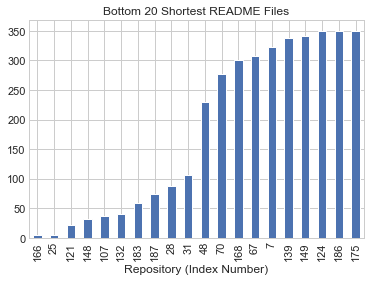

In [22]:
explore.min_words_in_read_mes()

# Answers:
- TypeScript has about 148 unique words
- Java has about 120 unique words
- Kotlin has about 98 unique words
- Python has about 85 unique words 
- JavaScript has about 78 unique words
- Go has about 70 unique words

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

# `Do length of words vary in READMEs based on programming languages?`

***

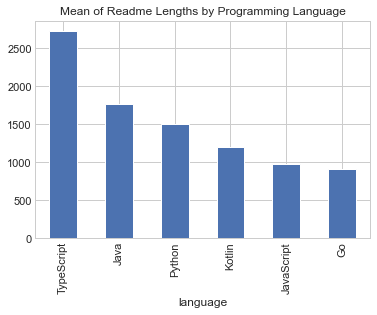

In [23]:
explore.read_me_lengths()

# Answers:
- TypeScipt has over 2600 words on avg
- Java has around 1800 words on avg
- Python has around 1500 words on avg
- Kotlin has around 1200 words on avg
- JavaScript has about 900 words on avg
- Go has about 800 words on avg

***
# End of Exploration

***

# `Modeling`
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px">

In [24]:
# Creates a list of top three languages from dataframe
top_languages = ['JavaScript','Python','TypeScript']
# Create a new version of our df to transform for modeling
model = df.copy()
# Rename the languages that are not in the top three "not_top"
model['language'] = model.language.apply(lambda lang : lang if lang in top_languages else "not_top")
# Show the distribution
round(model.language.value_counts(normalize=True),4)*100

JavaScript    42.50
Python        36.25
not_top       14.38
TypeScript     6.88
Name: language, dtype: float64

In [25]:
# Baseline prediction
print(f'Baseline Accuracy: {round(max(train.language.value_counts()) / train.shape[0] *100)}%')

Baseline Accuracy: 43%


In [26]:
# Create the tf-idf model
tfidf = TfidfVectorizer()
# Fit the model and create the X, y variables for modeling
X = tfidf.fit_transform(model.lemmatized)
y = model.language 
# Split the data into train (55%) validate (24%) test (20%) split
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state = 123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, stratify=y_train_validate, test_size=.3, random_state =123)

In [27]:
# Create Result Dataframes to store actual and predictive scores from the models
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

In [28]:
# Create and fit each model
lm = LogisticRegression(multi_class='multinomial',random_state=123).fit(X_train, y_train)
dtc = DecisionTreeClassifier(max_depth=5, random_state=123).fit(X_train, y_train)
rf = RandomForestClassifier(min_samples_leaf=3,max_depth=5, random_state=123).fit(X_train,y_train)
knn = KNeighborsClassifier().fit(X_train,y_train)

In [29]:
# Store the train predictions in our result df
train['lm_predicted'] = lm.predict(X_train)
train['dtc_predicted'] = dtc.predict(X_train)
train['rf_predicted'] = rf.predict(X_train)
train['knn_predicted'] = knn.predict(X_train)

In [30]:
# Assign the validate predictions to the results df
validate['lm_predicted'] = lm.predict(X_validate)
validate['dtc_predicted'] = dtc.predict(X_validate)
validate['rf_predicted'] = rf.predict(X_validate)
validate['knn_predicted'] = knn.predict(X_validate)

In [31]:
# Creates the list to model and graph
model_list = [lm, dtc, rf, knn]

model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'KNN']

language_names = ['JavaScript', 'Python', 'TypeScript','not_top' ]

In [32]:
# Creates a dataframe to store the scores by model

score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])

LogisticRegression(multi_class='multinomial', random_state=123)
Train Scores
Accuracy Score: 82.02%
              precision    recall  f1-score   support

  JavaScript       0.72      1.00      0.84        38
      Python       0.97      0.97      0.97        32
  TypeScript       0.00      0.00      0.00         6
     not_top       1.00      0.31      0.47        13

    accuracy                           0.82        89
   macro avg       0.67      0.57      0.57        89
weighted avg       0.80      0.82      0.77        89



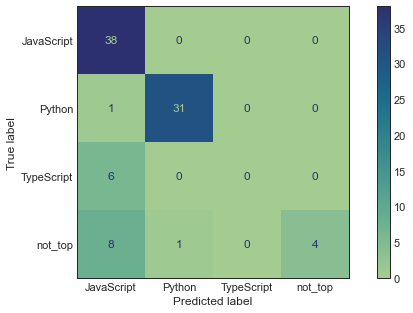


LogisticRegression(multi_class='multinomial', random_state=123)
Validate Scores
Accuracy Score: 58.97%
              precision    recall  f1-score   support

  JavaScript       0.53      0.94      0.68        17
      Python       0.78      0.50      0.61        14
  TypeScript       0.00      0.00      0.00         3
     not_top       0.00      0.00      0.00         5

    accuracy                           0.59        39
   macro avg       0.33      0.36      0.32        39
weighted avg       0.51      0.59      0.52        39



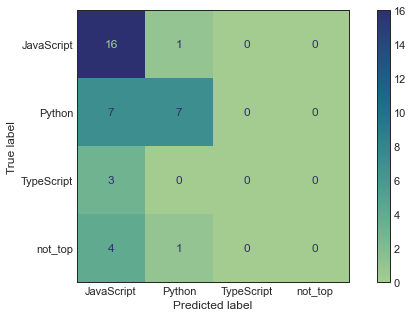


-------------------------------------------------------------------

DecisionTreeClassifier(max_depth=5, random_state=123)
Train Scores
Accuracy Score: 83.15%
              precision    recall  f1-score   support

  JavaScript       0.72      1.00      0.84        38
      Python       1.00      0.75      0.86        32
  TypeScript       1.00      0.50      0.67         6
     not_top       1.00      0.69      0.82        13

    accuracy                           0.83        89
   macro avg       0.93      0.74      0.79        89
weighted avg       0.88      0.83      0.83        89



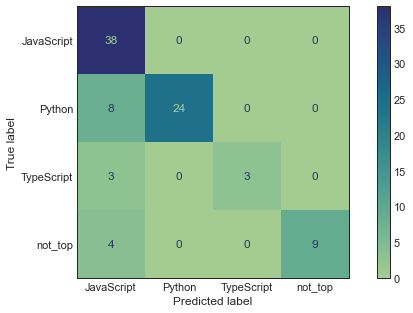


DecisionTreeClassifier(max_depth=5, random_state=123)
Validate Scores
Accuracy Score: 56.41%
              precision    recall  f1-score   support

  JavaScript       0.64      0.94      0.76        17
      Python       0.83      0.36      0.50        14
  TypeScript       0.00      0.00      0.00         3
     not_top       0.20      0.20      0.20         5

    accuracy                           0.56        39
   macro avg       0.42      0.37      0.37        39
weighted avg       0.60      0.56      0.54        39



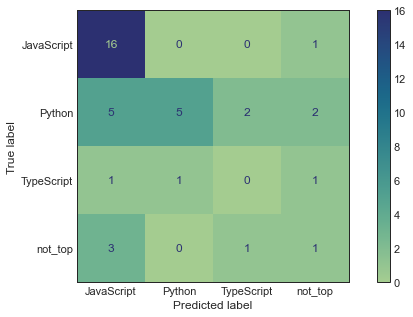


-------------------------------------------------------------------

RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)
Train Scores
Accuracy Score: 77.53%
              precision    recall  f1-score   support

  JavaScript       0.66      1.00      0.79        38
      Python       1.00      0.78      0.88        32
  TypeScript       1.00      0.33      0.50         6
     not_top       1.00      0.31      0.47        13

    accuracy                           0.78        89
   macro avg       0.91      0.61      0.66        89
weighted avg       0.85      0.78      0.76        89



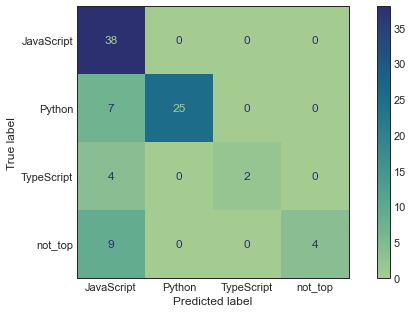


RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)
Validate Scores
Accuracy Score: 58.97%
              precision    recall  f1-score   support

  JavaScript       0.55      1.00      0.71        17
      Python       0.75      0.43      0.55        14
  TypeScript       0.00      0.00      0.00         3
     not_top       0.00      0.00      0.00         5

    accuracy                           0.59        39
   macro avg       0.32      0.36      0.31        39
weighted avg       0.51      0.59      0.50        39



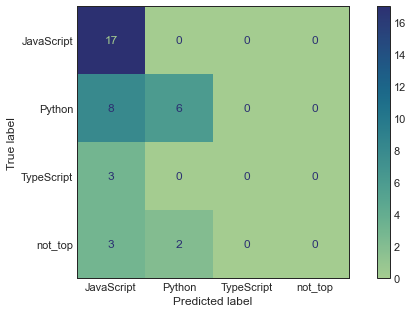


-------------------------------------------------------------------

KNeighborsClassifier()
Train Scores
Accuracy Score: 69.66%
              precision    recall  f1-score   support

  JavaScript       0.64      0.84      0.73        38
      Python       0.79      0.69      0.73        32
  TypeScript       0.60      0.50      0.55         6
     not_top       0.83      0.38      0.53        13

    accuracy                           0.70        89
   macro avg       0.71      0.60      0.63        89
weighted avg       0.72      0.70      0.69        89



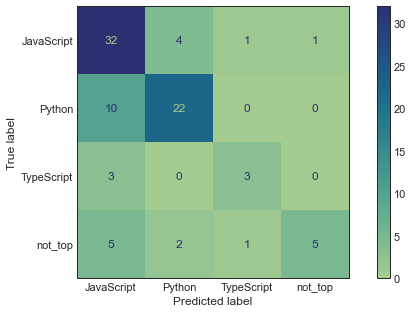


KNeighborsClassifier()
Validate Scores
Accuracy Score: 69.23%
              precision    recall  f1-score   support

  JavaScript       0.70      0.82      0.76        17
      Python       0.71      0.71      0.71        14
  TypeScript       0.00      0.00      0.00         3
     not_top       0.60      0.60      0.60         5

    accuracy                           0.69        39
   macro avg       0.50      0.53      0.52        39
weighted avg       0.64      0.69      0.66        39



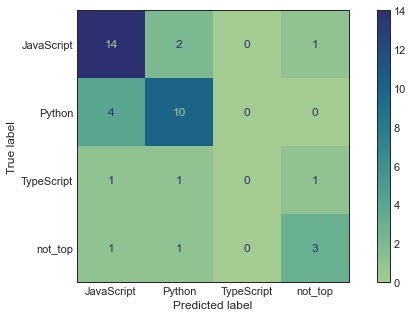


-------------------------------------------------------------------



In [33]:
# Loops the models from modeling.py function
for model, name in zip(model_list, model_names):
    score_df = modeling.test_model(X_train, y_train, X_validate, y_validate,  model, name, score_df)
    
    modeling.make_models_and_print_metrics(model, model_names, X_train, y_train, X_validate, y_validate, language_names)

In [34]:
# Sorts the train and validate scores by validate
score_df.sort_values(by = 'validate_score', ascending = False)

,model_name,train_score,validate_score
3,KNN,69.66,69.23
0,LogisticRegression,82.02,58.97
2,RandomForest,77.53,58.97
1,DecisionTree,83.15,56.41


In [35]:
# Creates a 'mean' feature of the two scores
score_df['mean'] = round(score_df.mean(numeric_only=True, axis=1),2)
score_df

,model_name,train_score,validate_score,mean
0,LogisticRegression,82.02,58.97,70.50
1,DecisionTree,83.15,56.41,69.78
2,RandomForest,77.53,58.97,68.25
3,KNN,69.66,69.23,69.44


`takeaways:`
- Decision Tree outperformed on train but dropped dramatically on validate. This was the same for Decision Tree and Random Forest. 
- KNN was the least accurate on train but was very consistent on validate, therefore we will go with KNN on our test data set.

In [36]:
# Assign the predicitons to the results df
test['knn_predicted'] = knn.predict(X_test)

In [37]:
# Returns the test data
print('KNN Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.knn_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.knn_predicted, test.actual))
print('---')
print(classification_report(test.actual, test.knn_predicted))

KNN Accuracy: 56.25%
---
Confusion Matrix
actual         JavaScript  Python  TypeScript  not_top
knn_predicted                                         
JavaScript             11       5           1        3
Python                  2       7           1        2
---
              precision    recall  f1-score   support

  JavaScript       0.55      0.85      0.67        13
      Python       0.58      0.58      0.58        12
  TypeScript       0.00      0.00      0.00         2
     not_top       0.00      0.00      0.00         5

    accuracy                           0.56        32
   macro avg       0.28      0.36      0.31        32
weighted avg       0.44      0.56      0.49        32



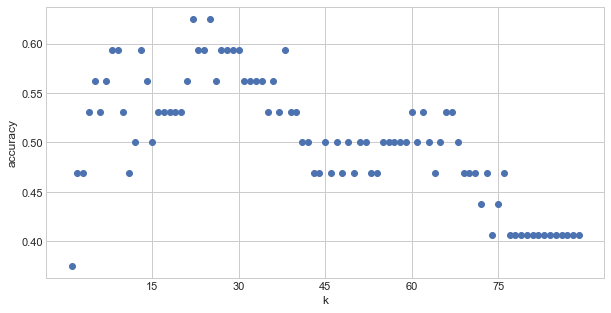

In [38]:
# Plots the knn test scores
import matplotlib.pyplot as plt
k_range = range(1, 90)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([15,30,45,60,75])
plt.show()

In [39]:
test.head()

,actual,knn_predicted
168,Python,Python
41,JavaScript,JavaScript
182,JavaScript,JavaScript
96,Python,Python
181,Python,Python


# `Conclusion` 

This data set had over 150 repositories. We fit several different models and found that the KNN model was the most accurate. It predicted the main programming language with an accuracy of 56.25% on lemmatized data. We noticed that it is not very accurate when predicting TypeScript but this is because there were only two readmes with this programming language on our test data. In the train data set there were only six of these so perhaps we need to increase our acquire data. Overall we were pretty accurate in predicting JavaScript or Python as the programming language.


---

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px">


## Key Findings

- Baseline accuracy was set to 43%
- The best performing model was the K-Nearest Neighbors model.
- This model remained consistent across train and validate
- The model was also used on lemmatized data which outperformed the baseline by 13%.

___

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px">

### Recommendations:

More Github data is required. Scrape more data for a more accurate model.

___

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px">

### Given more time:
We would acquire more of these repositories since our dataset was less than 200. We would also like to convert other languages other than English to see the relationship across the board.

___

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px">